# Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# Descripción de los datos

Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad

name: nombre del barrio

neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis

cab_id: código del vehículo

vehicle_id: ID técnico del vehículo

company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes

trip_id: código del viaje

cab_id: código del vehículo que opera el viaje

start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)

end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)

duration_seconds: duración del viaje en segundos

distance_miles: distancia del viaje en millas

pickup_location_id: código del barrio de recogida

dropoff_location_id: código del barrio de finalización

tabla weather_records: datos sobre el clima

record_id: código del registro meteorológico

ts: fecha y hora del registro (tiempo redondeado a la hora)

temperature: temperatura cuando se tomó el registro

description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

# Esquema de la tabla

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_Untitled_1_1585510727.png">

Nota: no existe una conexión directa entre las tablas trips y weather_records en la base de datos. Pero aún puedes usar JOIN y vincularlas usando la hora en la que comenzó el viaje (trips.start_ts) y la hora en la que se tomó el registro meteorológico (weather_records.ts).

# Instrucciones para completar el proyecto

Importamos librerias

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import sqlite3
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import datetime


Importamos archivos

In [2]:
result_1= pd.read_csv('/datasets/project_sql_result_01.csv')
result_4= pd.read_csv('/datasets/project_sql_result_04.csv')
result_7= pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
print(result_1.info())
display(result_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
print(result_4.info())
display(result_4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


# Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:
company_name: nombre de la empresa de taxis
trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

project_sql_result_04.csv. Contiene los siguientes datos:
dropoff_location_name: barrios de Chicago donde finalizaron los viajes
average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets ahora necesitas:

importar los archivos

estudiar los datos que contienen

asegurarte de que los tipos de datos sean correctos

identificar los 10 principales barrios en términos de finalización

hacer gráficos: 

empresas de taxis número de viajes

los 10 barrios principales por número de finalizaciones

sacar conclusiones basadas en cada gráfico y explicar los resultados

### Result_1

Los datos ya estan importados

Calculamos el total de viajes

In [5]:
print(result_1['trips_amount'].sum())

137311


Mostramos los primeros 10 lugares

In [6]:
result_1_sorted = result_1.sort_values('trips_amount', ascending=False)
result_1_10=result_1_sorted.head(10)
display(result_1_sorted.head(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Calculamos los bins

In [7]:
n = len(result_1_10['trips_amount'])

bins = 1 + math.log2(n)

bins = int(round(bins))


print("Numero de bins según la regla de sturges:", bins)

Numero de bins según la regla de sturges: 4


Creamos histograma

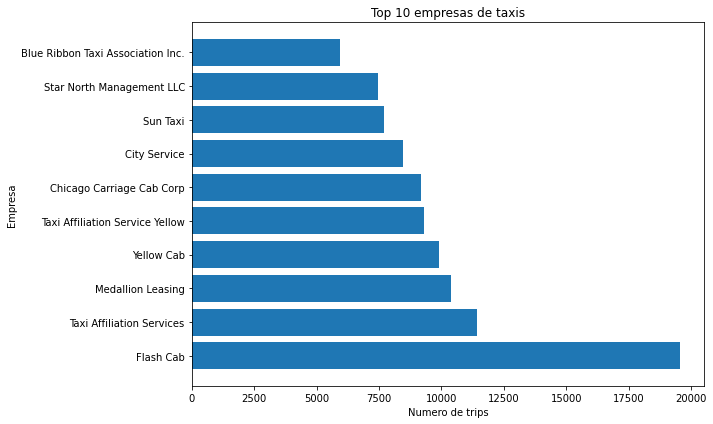

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(result_1_10['company_name'], result_1_10['trips_amount'])
plt.xlabel('Numero de trips')
plt.ylabel('Empresa')
plt.title('Top 10 empresas de taxis')
plt.tight_layout()
plt.show()

Las primera empresa Flash Cab es lider , despues tenemos las otras 9 que decrecen poco a poco, solo Taxi Affilliation Service Yellow y Chicago Carriage Cab Corp tienen resultados bastante similares

### Result 4

Los datos ya estan importados

Tomamos los primeros 10 lugares

In [9]:
result_4_sorted = result_4.sort_values('average_trips', ascending=False)
result_4_10=result_4_sorted.head(10)
display(result_4_sorted.head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Calculamos los bin con regla de sturges

In [10]:
n = len(result_4_10['average_trips'])

bins_4 = 1 + math.log2(n)

bins_4 = int(round(bins))


print("Numero de bins según la regla de sturges:", bins_4)

Numero de bins según la regla de sturges: 4


Creamos el histograma

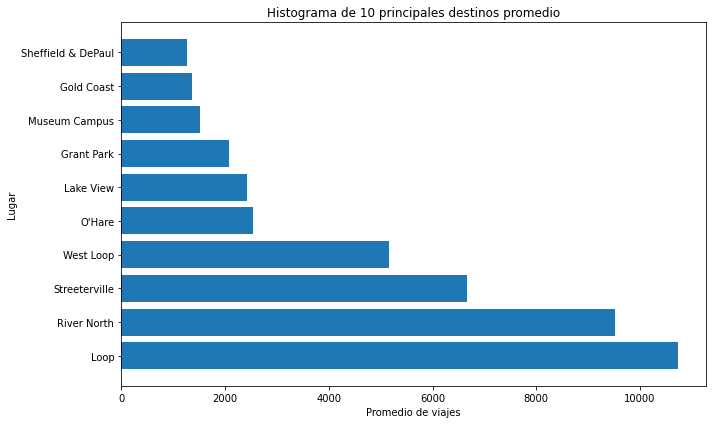

In [11]:
# Hist
plt.figure(figsize=(10, 6))
plt.barh(result_4_10['dropoff_location_name'], result_4_10['average_trips'])
plt.xlabel('Promedio de viajes')
plt.ylabel('Lugar')
plt.title('Histograma de 10 principales destinos promedio')
plt.tight_layout()
plt.show()

Podemos apreciar con bastante claridad que los primeros 2 lugares Loop y River North, son por mucho los destinos mas concurridos, despues los 3 y 4 Streeterville y West Loop, tienen un resultado similar al 1 y 2 pero en una menor proporcion, de igual manera que los otros 6 lugares

# Paso 5. Prueba de hipótesis (Python)

Importamos archivos

In [12]:
print(result_7.info())
display(result_7.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Vamos a corregir el tipo de dato de start_ts a fecha

In [13]:
result_7['start_ts'] = pd.to_datetime(result_7['start_ts'])

print(result_7.info())
display(result_7.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Tomamos el promedio de todos los viajes

In [14]:
result_7['duration_avg'] = result_7['duration_seconds'].mean()
display(result_7.head())


,start_ts,weather_conditions,duration_seconds,duration_avg
0,2017-11-25 16:00:00,Good,2410.0,2071.731273
1,2017-11-25 14:00:00,Good,1920.0,2071.731273
2,2017-11-25 12:00:00,Good,1543.0,2071.731273
3,2017-11-04 10:00:00,Good,2512.0,2071.731273
4,2017-11-11 07:00:00,Good,1440.0,2071.731273


In [15]:
average_duration = result_7['duration_seconds'].mean()
print("Tiempo promedio:", average_duration)


Tiempo promedio: 2071.7312734082398


Filtramos por sabado y por bad

In [16]:
result_7_saturday_bad = result_7[(result_7['start_ts'].dt.dayofweek == 5) & (result_7['weather_conditions'] == 'Bad')].groupby('start_ts').mean()
display(result_7_saturday_bad)


,duration_seconds,duration_avg
start_ts,,
2017-11-04 16:00:00,2972.461538,2071.731273
2017-11-04 17:00:00,2434.500000,2071.731273
2017-11-04 18:00:00,2251.941176,2071.731273
2017-11-18 00:00:00,480.000000,2071.731273
2017-11-18 07:00:00,1402.333333,2071.731273
2017-11-18 08:00:00,1464.058824,2071.731273
2017-11-18 09:00:00,1378.500000,2071.731273
2017-11-18 10:00:00,1729.214286,2071.731273
2017-11-18 12:00:00,2775.423077,2071.731273


Calculamos promedios para los datos filtrados

In [17]:
average_sat_duration = result_7_saturday_bad['duration_seconds'].mean()
print("Tiempo promedio:", average_sat_duration)


Tiempo promedio: 2087.442406311637


project_sql_result_07.csv: el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
start_ts: fecha y hora de recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos


Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Establece el valor del nivel de significación (alfa) por tu cuenta.
Explica:
cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [21]:
statistic, pvalue = ttest_ind(result_7_saturday_bad['duration_seconds'], result_7['duration_seconds'])

print("Estadística de prueba:", statistic)
print("Valor p:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Hipótesis nula. La duracion de los viajes no cambia en sabados lluviosos.")
else:
    print("Hipotesis alternativa. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")

Estadística de prueba: 0.07314521569385107
Valor p: 0.9417041176400133
Hipotesis alternativa. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


# Conclusion

Comparamos la duracion de los viajes en sabados con lluvia o un clima malo con los viajes en un dia cualquiera, pudimos comprobar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare efectivamente cambia los sábados lluviosos.

Ademas me di a la tarea de tomar los tiempos promedios de los viajes, siendo para un sabado con mal clima un tiempo promedio de 2087.442406311637,  mientras que para los demas dias teniamos un tiempo promedio de 2071.7312734082398

Es bastante evidente la diferencia, esto se debe a que con un mal clima hay mas riesgo en el camino y con ello la velocidad de los conductores puede verse reducida.

De igual forma pudimos ver que empresa es mas popular, resultando en Flash Cab que es lider , despues tenemos las otras 9 que decrecen poco a poco, solo Taxi Affilliation Service Yellow y Chicago Carriage Cab Corp tienen resultados bastante similares, siendo los primeros 2 destinos mas populares Loop y River North, despues los 3 y 4 Streeterville y West Loop, tienen un resultado similar al 1 y 2 pero en una menor proporcion, de igual manera que los otros 6 lugares.